In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2023-06-24 18:30:20.530064: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-24 18:30:20.542912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 18:30:20.658001: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 18:30:20.659789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 18:30:21.540829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
column_names = ['Sexo', 'Percentil', 'Edad', 'IMC']
raw_dataset = pd.read_csv("IMC_Varones_y_mujeres.csv", names=column_names, sep=',',skiprows=1)

In [3]:
dataset = raw_dataset.copy()

df=raw_dataset.copy()

filtered_df = df[(df['Edad'] < 5.5)]

filtered_df

Sexo  Percentil      Edad        IMC
0      V         97  5.118310  16.465448
15     V         85  5.118310  15.385226
30     V         75  5.124883  14.956315
45     V         25  5.118310  13.574266
60     V         10  5.105165  13.050041
75     V          3  5.124883  12.541698
90     M         97  5.125235  18.614898
105    M         85  5.125235  16.958847
120    M         75  5.118644  16.321905
136    M         50  5.184558  15.270949
151    M         25  5.131827  14.331459
166    M         10  5.118644  13.583050
181    M          3  5.164783  12.961782

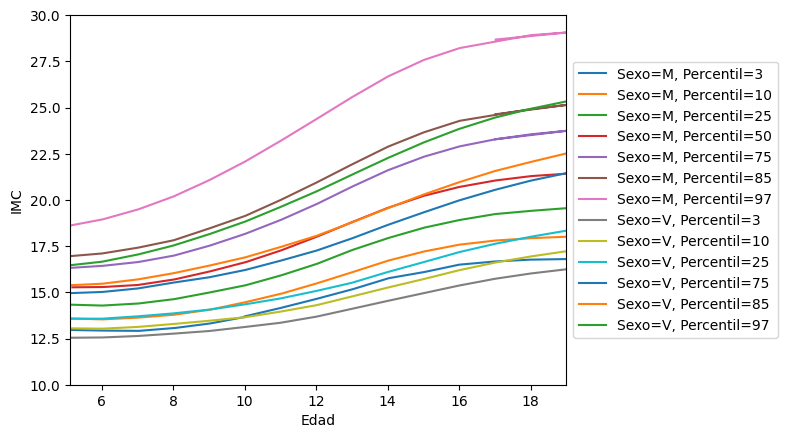

In [4]:
df=raw_dataset.copy()

# Define the x range a partir de valores únicos de edad (para pone en el eje x)
x_range = df['Edad'].unique()

# Group the data by Sexo and Percentil
groups = df.groupby(['Sexo', 'Percentil'])

# Create a figure and axes
fig, ax = plt.subplots()


# Iterate over each group and plot the data
for i, ((sexo, percentil), group) in enumerate(groups):
    # Extract the x and y values
    x = group['Edad']
    y = group['IMC']
    
    # Plot the data on the axes, offset vertically by i
    ax.plot(x, y, label=f"Sexo={sexo}, Percentil={percentil}")

# Set the x-axis limits and labels
ax.set_xlim(x_range[0], x_range[-1])
ax.set_xlabel("Edad")

# Set the y-axis limits and label
ax.set_ylim(10, 30)

# Automatically set the y-axis limits based on the data range
#ax.autoscale(enable=True, axis='y')
ax.set_ylabel("IMC")

# Add a legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plot
plt.show()

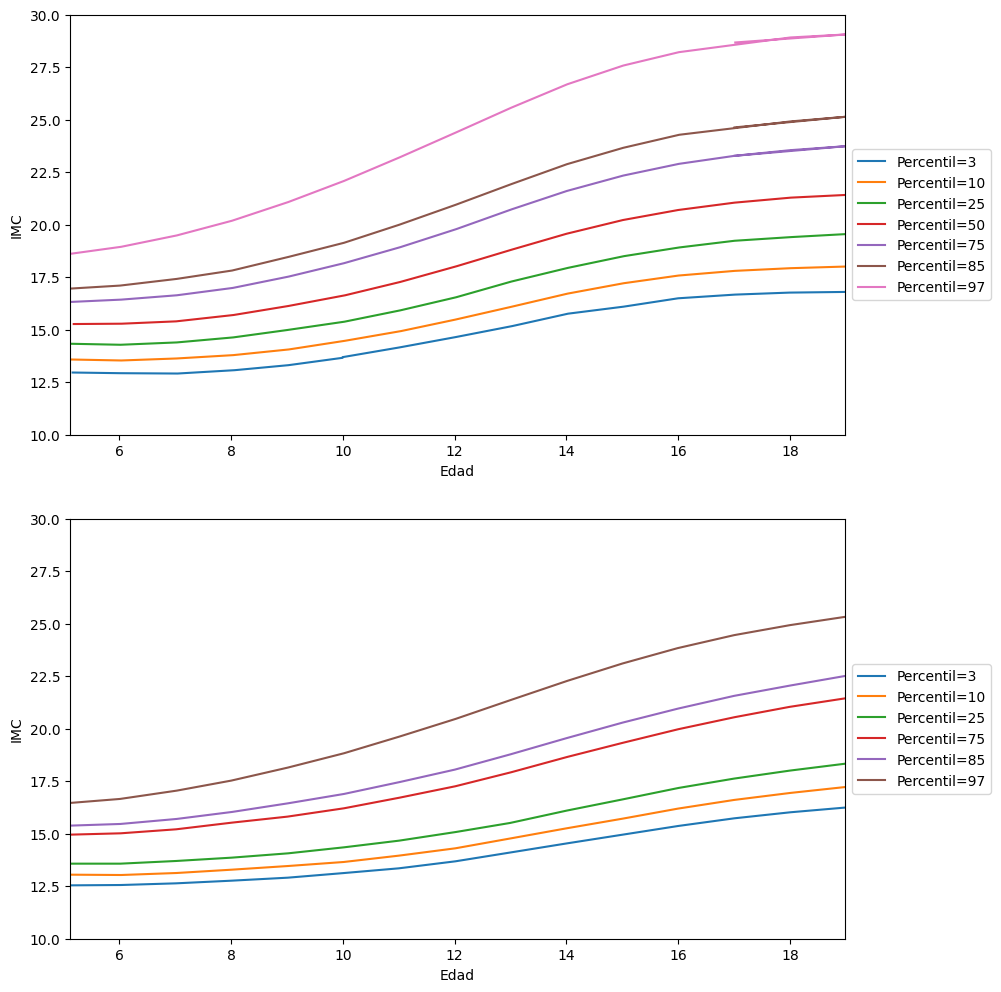

In [5]:

# Define the x range
x_range = df['Edad'].unique()

# Group the data by Sexo and Percentil
groups = df.groupby(['Sexo', 'Percentil'])

# Create two sets of axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Iterate over each group and plot the data on the appropriate axis
for i, ((sexo, percentil), group) in enumerate(groups):
    # Extract the x and y values
    x = group['Edad']
    y = group['IMC']
    
    # Plot the data on the appropriate axis, offset vertically by i
    if sexo == 'M':
        ax1.plot(x, y, label=f"Percentil={percentil}")
    else:
        ax2.plot(x, y, label=f"Percentil={percentil}")

# Set the x-axis limits and labels for both plots
ax1.set_xlim(x_range[0], x_range[-1])
ax2.set_xlim(x_range[0], x_range[-1])
ax1.set_xlabel("Edad")
ax2.set_xlabel("Edad")

# Set the y-axis limits and label for both plots
ax1.set_ylim(10, 30)
ax2.set_ylim(10, 30)
ax1.set_ylabel("IMC")
ax2.set_ylabel("IMC")

# Add a legend to each plot
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plots
plt.show()


In [6]:
# Cambio M y V por 1 y 0 paso todas las columnas a float32
dataset = pd.get_dummies(dataset, columns = ['Sexo'], prefix='', prefix_sep='',dtype=int).astype("float32")

In [7]:
# Agarro un 80% para entrenar
train_dataset = dataset.sample(frac=0.8, random_state=0)

# Saco los entrenados
test_dataset = dataset.drop(train_dataset.index)

dataset.head()

Percentil      Edad        IMC    M    V
0       97.0  5.118310  16.465448  0.0  1.0
1       97.0  6.012207  16.656076  0.0  1.0
2       97.0  7.030986  17.053217  0.0  1.0
3       97.0  8.003756  17.529785  0.0  1.0
4       97.0  9.015963  18.149324  0.0  1.0

In [8]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Extraigo de los datos el resultado que espero obtener
train_labels = train_features.pop('Percentil')
test_labels = test_features.pop('Percentil')

print(type(train_labels))
print(type(test_labels))

test_labels.tail()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


174    10.0
185     3.0
187     3.0
190     3.0
192     3.0
Name: Percentil, dtype: float32

In [9]:
# Normalizo tomando la última columna como referencia (pero normaliza todas)
normalizer = tf.keras.layers.Normalization(axis=-1)

In [10]:
normalizer.adapt(np.array(train_features))

df0 = pd.concat([train_features,train_labels], axis=1)

# display the DataFrame
df0

Edad        IMC    M    V  Percentil
110  10.022599  19.140375  1.0  0.0       85.0
12   17.001877  24.455917  0.0  1.0       97.0
178  17.016008  17.802795  1.0  0.0       10.0
74   19.006573  17.227959  0.0  1.0       10.0
149  18.017891  21.290058  1.0  0.0       50.0
..         ...        ...  ...  ...        ...
154   8.038607  14.634007  1.0  0.0       25.0
128  13.021658  20.732731  1.0  0.0       75.0
34    9.009390  15.814137  0.0  1.0       75.0
28   18.007511  22.057186  0.0  1.0       85.0
114  14.010358  22.882414  1.0  0.0       85.0

[158 rows x 5 columns]

In [11]:
print(normalizer.mean.numpy())

[[11.841 17.906  0.551  0.449]]


In [12]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print("------------")
  # print('Normalized:', normalizer(first).numpy().astype("float32"))
  print('Normalized:', normalizer(first).numpy())

First example: [[10.02 19.14  1.    0.  ]]
------------
Normalized: [[-0.42  0.34  0.9  -0.9 ]]


In [13]:
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [14]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 101ms/step


array([[ 0.03 ],
       [-0.106],
       [ 0.028],
       [-0.135],
       [-0.032],
       [-0.048],
       [-0.099],
       [-0.007],
       [ 0.022],
       [-0.04 ]], dtype=float32)

In [15]:
%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=300,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


df = pd.concat([test_features,test_labels], axis=1)

# display the DataFrame
df

CPU times: user 10 s, sys: 1.73 s, total: 11.7 s
Wall time: 8.29 s


Edad        IMC    M    V  Percentil
9    14.017839  22.279587  0.0  1.0       97.0
21   11.027230  17.466242  0.0  1.0       85.0
25   15.010329  20.293882  0.0  1.0       85.0
29   19.000000  22.517872  0.0  1.0       85.0
31    6.025352  15.019857  0.0  1.0       75.0
32    7.017840  15.210485  0.0  1.0       75.0
36   11.020658  16.719618  0.0  1.0       75.0
39   14.017839  18.657665  0.0  1.0       75.0
47    7.011268  13.701350  0.0  1.0       25.0
58   18.000938  18.006353  0.0  1.0       25.0
67   12.013145  14.305004  0.0  1.0       10.0
70   15.010329  15.718824  0.0  1.0       10.0
72   17.001877  16.608419  0.0  1.0       10.0
77    7.011268  12.637012  0.0  1.0        3.0
79    9.015963  12.907069  0.0  1.0        3.0
81   11.000938  13.351865  0.0  1.0        3.0
82   12.013145  13.685463  0.0  1.0        3.0
87   17.008451  15.734710  0.0  1.0        3.0
88   18.007511  16.020651  0.0  1.0        3.0
99   14.016950  26.688147  1.0  0.0       97.0
103  19.006592  29.060759  1.0  0.0       97.0
115  15.018832  23.662670  1.0  0.0       85.0
117  18.017891  24.920631  1.0  0.0       85.0
127  12.032957  19.793242  1.0  0.0       75.0
140   9.027308  16.130821  1.0  0.0       50.0
142  11.031074  17.277317  1.0  0.0       50.0
147  16.000942  20.700886  1.0  0.0       50.0
148  17.009417  21.051205  1.0  0.0       50.0
151   5.131827  14.331459  1.0  0.0       25.0
163  17.009417  19.235916  1.0  0.0       25.0
165  19.006592  19.554388  1.0  0.0       25.0
166   5.118644  13.583051  1.0  0.0       10.0
172  11.044257  14.936554  1.0  0.0       10.0
173  12.006593  15.477956  1.0  0.0       10.0
174  13.001884  16.083052  1.0  0.0       10.0
185   9.027308  13.312099  1.0  0.0        3.0
187   9.996234  13.694266  1.0  0.0        3.0
190  13.034841  15.175159  1.0  0.0        3.0
192  15.025424  16.098726  1.0  0.0        3.0

In [16]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 60])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Percentil]')
  plt.legend()
  plt.grid(True)

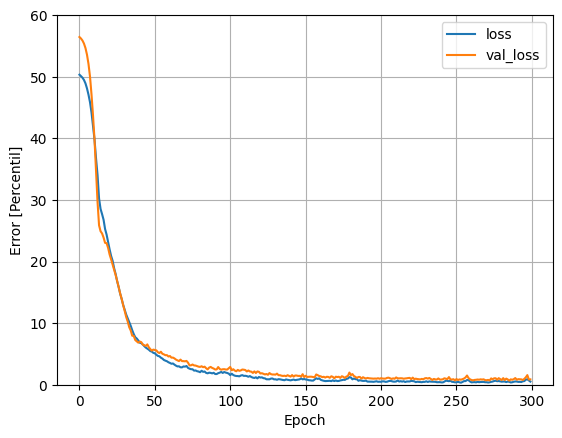

In [17]:
plot_loss(history)

In [18]:
#test_results = {}

test_results = model.evaluate(
    test_features, test_labels, verbose=1)

test_results

2/2 [==============================] - 0s 3ms/step - loss: 0.8477


0.8476928472518921

In [19]:
from IPython.display import display, HTML

predictions = model.predict(test_features)

df2 = pd.concat([test_features,test_labels], axis=1)
#df3 = pd.concat([df2,pd.DataFrame(predictions)], axis =1)

# display the DataFrame
# format the HTML table to display the DataFrames side by side
html = '''
<table>
  <tr>
    <td>{}</td>
    <td>{}</td>
  </tr>
</table>
'''

# display the formatted HTML table with the three DataFrames
display(HTML(html.format(df2.to_html(), pd.DataFrame(predictions).to_html())))

2/2 [==============================] - 0s 9ms/step


In [20]:
test_features

Edad        IMC    M    V
9    14.017839  22.279587  0.0  1.0
21   11.027230  17.466242  0.0  1.0
25   15.010329  20.293882  0.0  1.0
29   19.000000  22.517872  0.0  1.0
31    6.025352  15.019857  0.0  1.0
32    7.017840  15.210485  0.0  1.0
36   11.020658  16.719618  0.0  1.0
39   14.017839  18.657665  0.0  1.0
47    7.011268  13.701350  0.0  1.0
58   18.000938  18.006353  0.0  1.0
67   12.013145  14.305004  0.0  1.0
70   15.010329  15.718824  0.0  1.0
72   17.001877  16.608419  0.0  1.0
77    7.011268  12.637012  0.0  1.0
79    9.015963  12.907069  0.0  1.0
81   11.000938  13.351865  0.0  1.0
82   12.013145  13.685463  0.0  1.0
87   17.008451  15.734710  0.0  1.0
88   18.007511  16.020651  0.0  1.0
99   14.016950  26.688147  1.0  0.0
103  19.006592  29.060759  1.0  0.0
115  15.018832  23.662670  1.0  0.0
117  18.017891  24.920631  1.0  0.0
127  12.032957  19.793242  1.0  0.0
140   9.027308  16.130821  1.0  0.0
142  11.031074  17.277317  1.0  0.0
147  16.000942  20.700886  1.0  0.0
148  17.009417  21.051205  1.0  0.0
151   5.131827  14.331459  1.0  0.0
163  17.009417  19.235916  1.0  0.0
165  19.006592  19.554388  1.0  0.0
166   5.118644  13.583051  1.0  0.0
172  11.044257  14.936554  1.0  0.0
173  12.006593  15.477956  1.0  0.0
174  13.001884  16.083052  1.0  0.0
185   9.027308  13.312099  1.0  0.0
187   9.996234  13.694266  1.0  0.0
190  13.034841  15.175159  1.0  0.0
192  15.025424  16.098726  1.0  0.0